In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
police_killings = pd.read_csv("police_killings.csv", encoding="iso-8859-1")

In [3]:
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


In [4]:
print(police_killings.columns)

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year', 'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white', 'share_black', 'share_hispanic', 'p_income', 'h_income', 'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov', 'urate', 'college'], dtype='object')


In [5]:
police_killings["raceethnicity"].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
dtype: int64

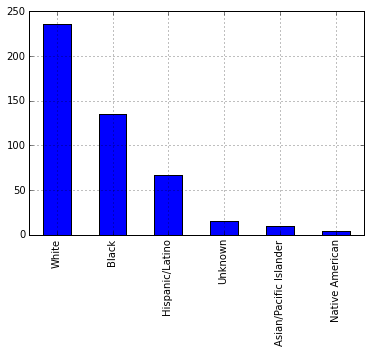

In [100]:
police_killings["raceethnicity"].value_counts().plot(kind="bar")
plt.show()

In [99]:
police_killings["raceethnicity"].value_counts() / sum(police_killings["raceethnicity"].value_counts())

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
dtype: float64

### Police killings by race
About 50% of the police killings sample are for white people, but about 77% of the population in the US as a whole is white. At the same time, almost 29% of people killed by police in this dataset were black, whereas only 13% of the US population as a whole is black. Clearly, blacks are over-represented in the police killings dataset, and whites are under-represented.

In [10]:
income = police_killings[police_killings["p_income"] != "-"]["p_income"].astype(int)

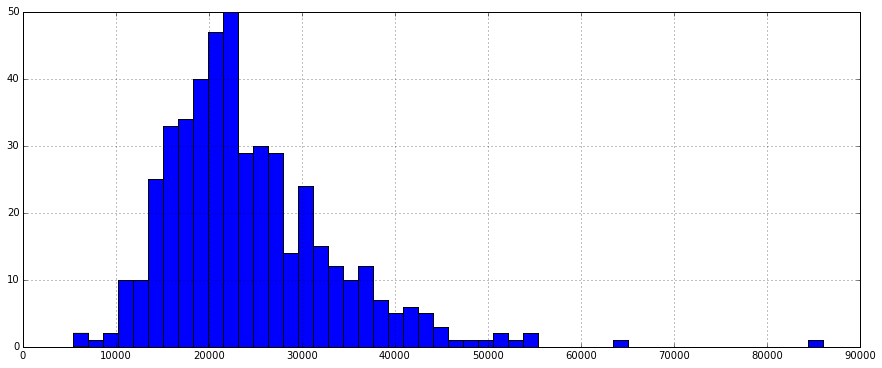

In [16]:
income.hist(bins=50, figsize=(15,6))

In [19]:
state_pop = pd.read_csv("state_population.csv")

In [22]:
counts = police_killings["state_fp"].value_counts()

In [23]:
states = pd.DataFrame({
        "STATE": counts.index,
        "shootings": counts
    })

In [24]:
states.head()

,STATE,shootings
6,6,74
48,48,47
12,12,29
4,4,25
40,40,22


In [26]:
states = pd.merge(state_pop, states, on="STATE")

In [27]:
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000

In [28]:
states["pop_millions"].head()

0     4.858979
1     0.738432
2     6.828065
3     2.978204
4    39.144818
Name: pop_millions, dtype: float64

In [29]:
states["rate"] = states["shootings"] / states["pop_millions"]

In [31]:
states.sort("rate").head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1,3.590886,0.278483
37,40,1,2,42,Pennsylvania,12802503,10112229,79.0,7,12.802503,0.546768
15,40,2,4,19,Iowa,3123899,2395103,76.7,2,3.123899,0.640226
32,40,1,2,36,New York,19795791,15584974,78.7,13,19.795791,0.656705
21,40,1,1,25,Massachusetts,6794422,5407335,79.6,5,6.794422,0.735898


In [34]:
states.sort("rate", ascending=False).head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
35,40,3,7,40,Oklahoma,3911338,2950017,75.4,22,3.911338,5.624674
2,40,4,8,4,Arizona,6828065,5205215,76.2,25,6.828065,3.661359
27,40,2,4,31,Nebraska,1896190,1425853,75.2,6,1.896190,3.164240
11,40,4,9,15,Hawaii,1431603,1120770,78.3,4,1.431603,2.794071
1,40,4,9,2,Alaska,738432,552166,74.8,2,0.738432,2.708442


In [59]:
bad_rows = police_killings[["share_white", "share_black", "share_hispanic"]].replace({"-": None}).isnull()

In [60]:
police_killings[bad_rows == True].shape

(467, 34)

In [62]:
police_killings[police_killings["share_white"] == "-"]

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
182,Hashim Abdul-Rasheed,41,Male,Black,January,7,2015,4600 International Gateway,Columbus,OH,...,-,-,NaN,50877,NaN,NaN,NaN,-,NaN,NaN
378,Richard White,63,Male,Black,March,20,2015,Louis Armstrong New Orleans International Airp...,Kenner,LA,...,-,-,NaN,48261,NaN,NaN,NaN,-,NaN,NaN


In [71]:
null_share_white = police_killings["share_white"] == "-"
null_share_black = police_killings["share_black"] == "-"
null_share_hispanic = police_killings["share_hispanic"] == "-"

In [75]:
police_killings[null_share_white | null_share_black | null_share_hispanic]

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
182,Hashim Abdul-Rasheed,41,Male,Black,January,7,2015,4600 International Gateway,Columbus,OH,...,-,-,NaN,50877,NaN,NaN,NaN,-,NaN,NaN
378,Richard White,63,Male,Black,March,20,2015,Louis Armstrong New Orleans International Airp...,Kenner,LA,...,-,-,NaN,48261,NaN,NaN,NaN,-,NaN,NaN


In [77]:
police_killings[null_share_hispanic][["share_white", "share_black", "share_hispanic"]]

,share_white,share_black,share_hispanic
182,-,-,-
378,-,-,-


In [83]:
pk = police_killings[(police_killings["share_white"] != "-") & 
                     (police_killings["share_black"] != "-") & 
                     (police_killings["share_hispanic"] != "-")].copy()

In [84]:
pk.shape

(465, 34)

In [85]:
police_killings.shape

(467, 34)

In [86]:
pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)

In [87]:
lowest_rates = states.sort("rate").head(10)
highest_rates = states.sort("rate", ascending=False).head(10)

In [95]:
lowest_rates

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1,3.590886,0.278483
37,40,1,2,42,Pennsylvania,12802503,10112229,79.0,7,12.802503,0.546768
15,40,2,4,19,Iowa,3123899,2395103,76.7,2,3.123899,0.640226
32,40,1,2,36,New York,19795791,15584974,78.7,13,19.795791,0.656705
21,40,1,1,25,Massachusetts,6794422,5407335,79.6,5,6.794422,0.735898
29,40,1,1,33,New Hampshire,1330608,1066610,80.2,1,1.330608,0.751536
19,40,1,1,23,Maine,1329328,1072948,80.7,1,1.329328,0.752260
13,40,2,3,17,Illinois,12859995,9901322,77.0,11,12.859995,0.855366
34,40,2,3,39,Ohio,11613423,8984946,77.4,10,11.613423,0.861073
45,40,2,3,55,Wisconsin,5771337,4476711,77.6,5,5.771337,0.866350


In [96]:
pk_lowest = pk[pk["state_fp"].isin(lowest_rates["STATE"])]
pk_highest = pk[pk["state_fp"].isin(highest_rates["STATE"])]

In [97]:
pk_lowest[["share_white", "share_black", "share_hispanic"]].mean()

share_white       60.132727
share_black       21.610909
share_hispanic    12.994545
dtype: float64

In [98]:
pk_highest[["share_white", "share_black", "share_hispanic"]].mean()

share_white       55.652174
share_black       11.532609
share_hispanic    20.693478
dtype: float64